# Predictive Model

In [60]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
plt.rcParams.update({'font.size': 14})

In [62]:
cwd = os.getcwd()

In [63]:
df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)
df = df.reset_index(drop=True)

In [64]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,NaN,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,NaN,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,NaN,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,NaN,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,NaN,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,NaN,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,NaN,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,NaN,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,NaN,PERPNH,Australia,1,0,1,5.62,0


We will one hot encode the categorical columns.

In [65]:
df = df.dropna(axis=1)
  
df


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,PERPNH,Australia,1,0,1,5.62,0


In [66]:
df_final = df

In [67]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [68]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)


In [69]:
#store the label for supervised learning
label = df['booking_complete']
df_final = df_final.drop('booking_complete', axis=1)


In [70]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


# Normalizing the Value

In [71]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)


In [72]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [73]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [74]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


# Correlation matrix


<AxesSubplot: >

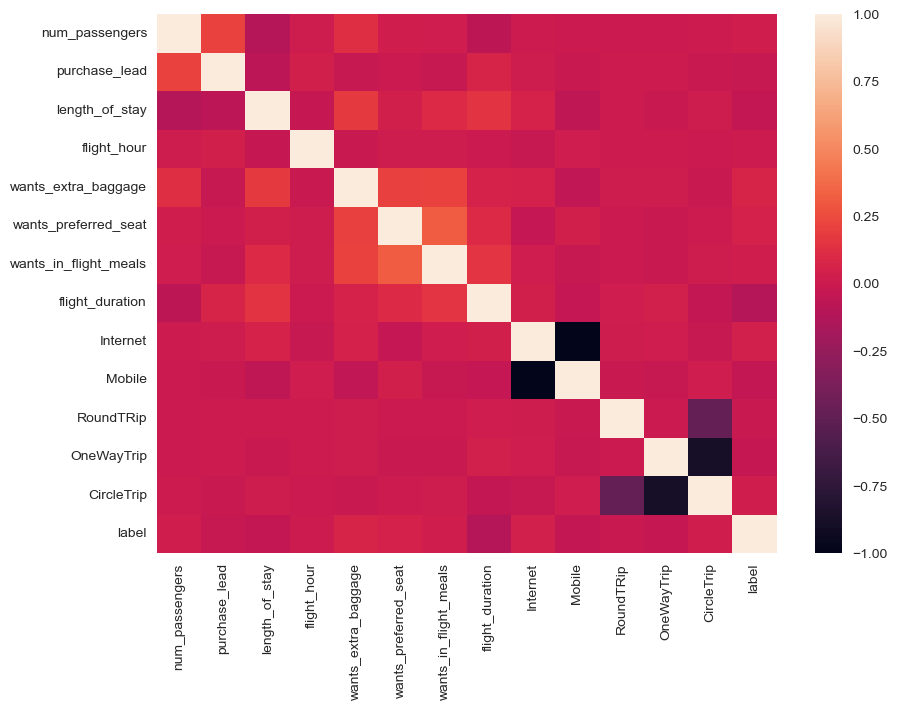

In [75]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)


Now let's split the dataset into train and test sets.

# Splitting Train and Test Data

In [76]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [77]:
!pip3 install yellowbrick

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [79]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)


# Random Forest Classifier

In [80]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

# Checking the training accuracy

In [81]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.7 respectively


0.9305989746154808

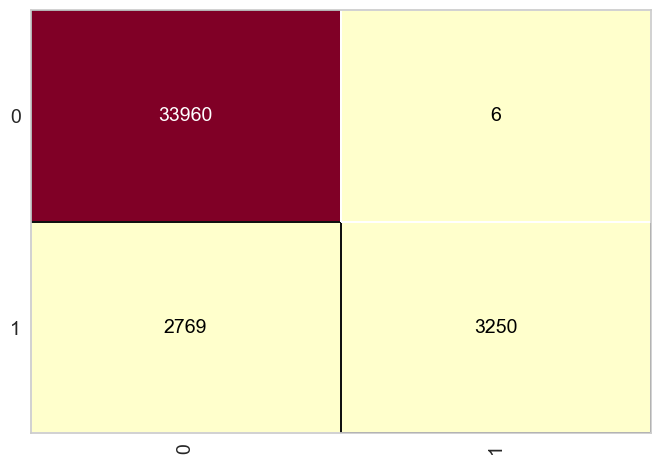

In [82]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

# Checking Testing accuracy

In [84]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.43 and 0.09 respectively


0.851555466639992

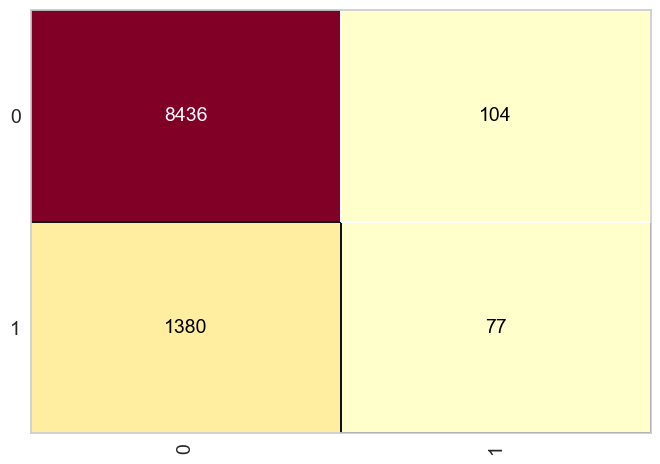

In [85]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

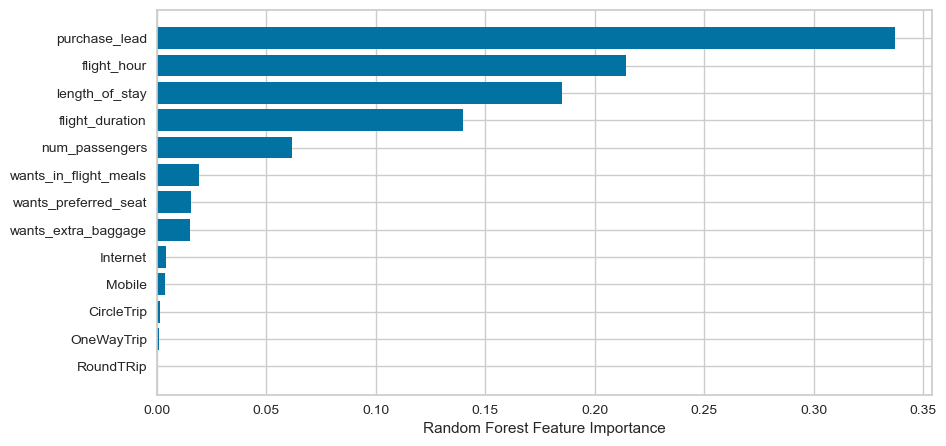

In [86]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

# Balancing the dataset

In [87]:
scaled_df.label.value_counts()


0    42506
1     7476
Name: label, dtype: int64

In [88]:

#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)


In [89]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)


In [90]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [91]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,-0.579424,0.136177,-0.001380,-0.566346,0.703587,-0.650054,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
1,0.400769,0.013849,-0.561979,0.726958,-1.421288,-0.650054,-0.863557,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
2,-0.579424,-0.942531,0.500210,-1.120618,0.703587,-0.650054,-0.863557,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,-0.542186,1.208335,0.726958,-1.421288,-0.650054,-0.863557,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,-0.579424,-0.764600,-0.532474,0.357443,0.703587,1.538334,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,-0.579424,-0.753479,-0.119401,0.542200,0.703587,-0.650054,-0.863557,-1.741921,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15472,1.380962,0.091694,-0.001380,-0.566346,-1.421288,1.538334,1.158002,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15473,-0.579424,-0.842445,-0.561979,2.389776,0.703587,1.538334,-0.863557,-1.300985,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15474,0.400769,-0.931411,-0.620990,1.281231,-1.421288,-0.650054,-0.863557,-0.439155,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


In [92]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [96]:
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)


In [97]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.62, 0.61, 0.58, 0.65 and 0.6 respectively


0.6172480620155039

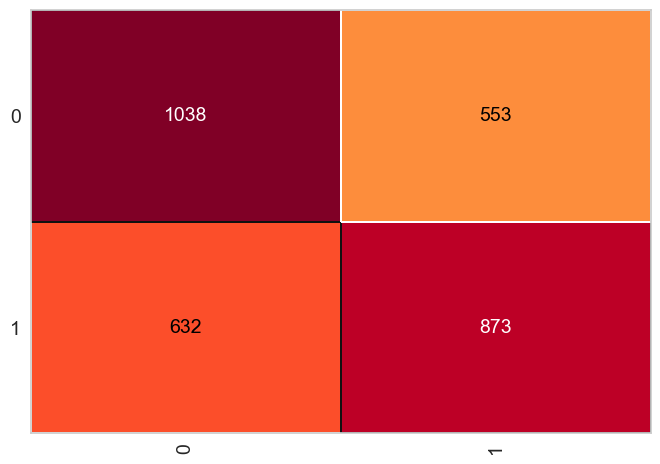

In [99]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

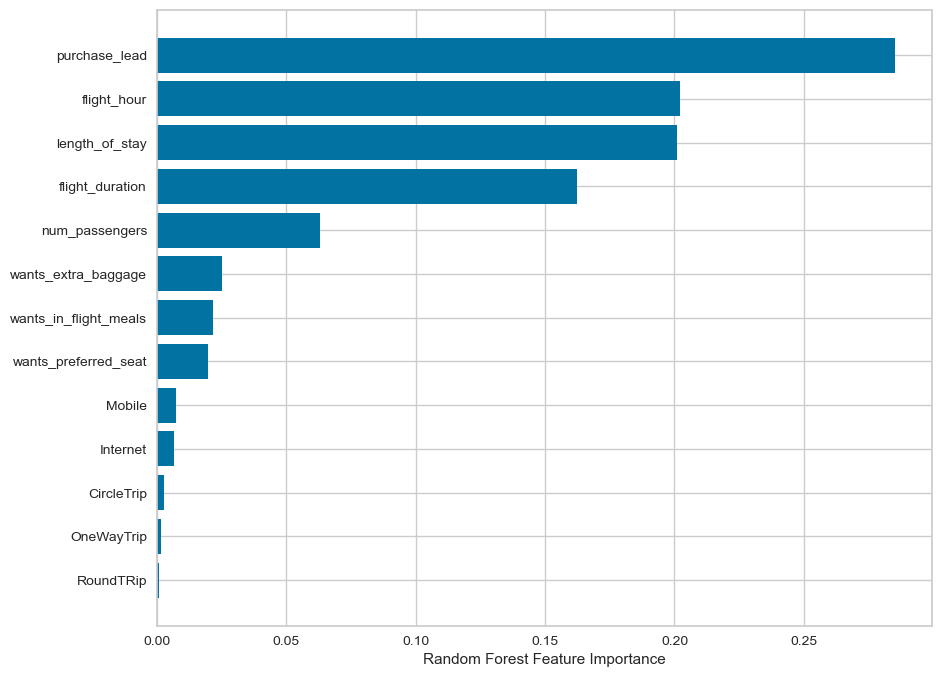

In [100]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")